# covid19 global spread analysis
Coronavirus spread analysis in Python, Jupyter and pandas

Contact: Robert Nowotniak <<rnowotniak@gmail.com>>

**Last updated:  Apr 5th, 2020**


----

Data sources from John Hopkins University:
* https://github.com/CSSEGISandData/COVID-19
* Global confirmed time series: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
* Global deaths time series: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
* Global recovered time series: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


Tools to reproduce and to rerun this analysis:

* docker pull jupyter/scipy-notebook
* docker run -p 8888:8888 -v "$PWD:/home/jovyan/work"   --rm jupyter/scipy-notebook




In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, matplotlib as mpl
plt.rcParams['figure.figsize'] = [12,8]

List of countries to include in the analysis:

In [2]:
COUNTRIES = ['United Kingdom', 'Poland','China','US','Italy','Canada', 'Spain', 'Germany']

Load data from John Hopkins University:

In [3]:
CONFIRMED_URL='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS_URL='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED_URL='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [4]:
confirmed = pd.read_csv(CONFIRMED_URL)
deaths    = pd.read_csv(DEATHS_URL)
recovered = pd.read_csv(RECOVERED_URL)

In [5]:
confirmed = confirmed.groupby(by='Country/Region').sum().transpose()[2:].applymap(lambda x: int(x))
deaths    =    deaths.groupby(by='Country/Region').sum().transpose()[2:].applymap(lambda x: int(x))
recovered = recovered.groupby(by='Country/Region').sum().transpose()[2:].applymap(lambda x: int(x))

In [6]:
confirmed.tail(10)[COUNTRIES]

Country/Region,United Kingdom,Poland,China,US,Italy,Canada,Spain,Germany
3/26/20,11812,1221,81782,83836,80589,4042,57786,43938
3/27/20,14745,1389,81897,101657,86498,4682,65719,50871
3/28/20,17312,1638,81999,121478,92472,5576,73235,57695
3/29/20,19780,1862,82122,140886,97689,6280,80110,62095
3/30/20,22453,2055,82198,161807,101739,7398,87956,66885
3/31/20,25481,2311,82279,188172,105792,8527,95923,71808
4/1/20,29865,2554,82361,213372,110574,9560,104118,77872
4/2/20,34173,2946,82432,243453,115242,11284,112065,84794
4/3/20,38689,3383,82511,275586,119827,12437,119199,91159
4/4/20,42477,3627,82543,308850,124632,12978,126168,96092


## Total confirmed cases (cumulative)

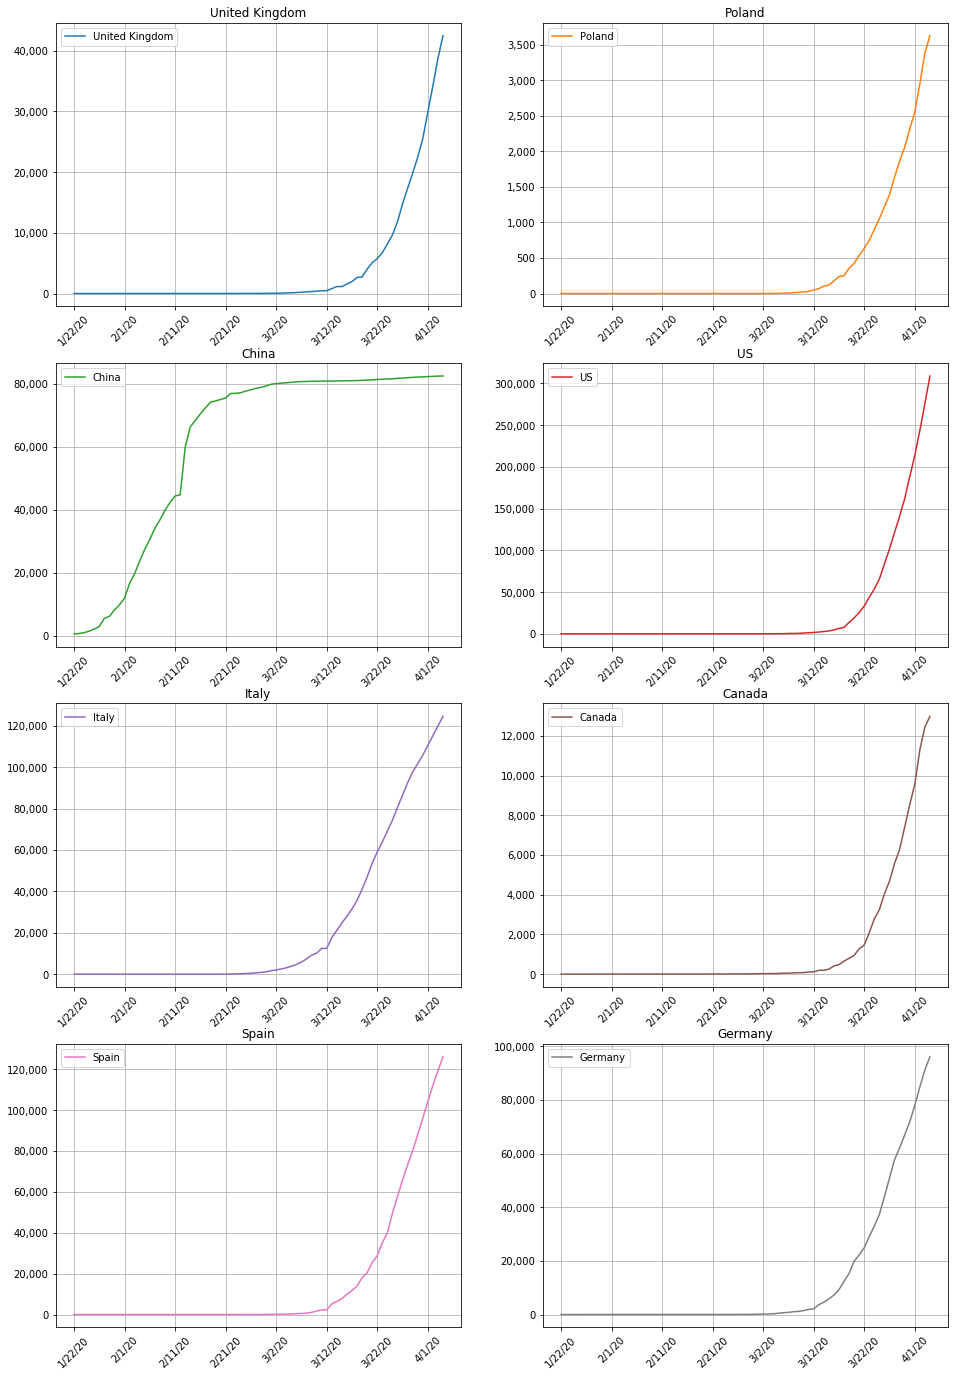

In [7]:
axs = confirmed[COUNTRIES].plot(subplots=True,layout=(4,2),figsize=(16,24),
                               title=COUNTRIES, sharex=False, rot=45, grid=True)
for row in axs:
    for ax in row:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## Total confirmed cases (cumulative)  -  one chart

Text(0.5, 1.0, 'Total confirmed cases')

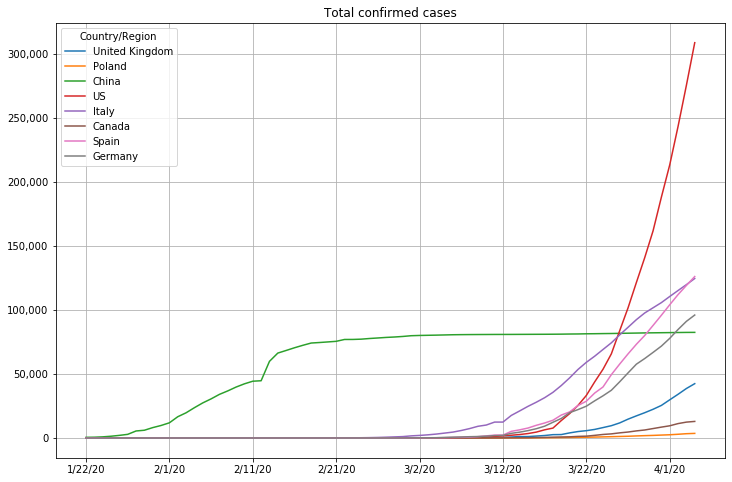

In [8]:
ax = confirmed[COUNTRIES].plot(grid=True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Total confirmed cases')

## Active cases

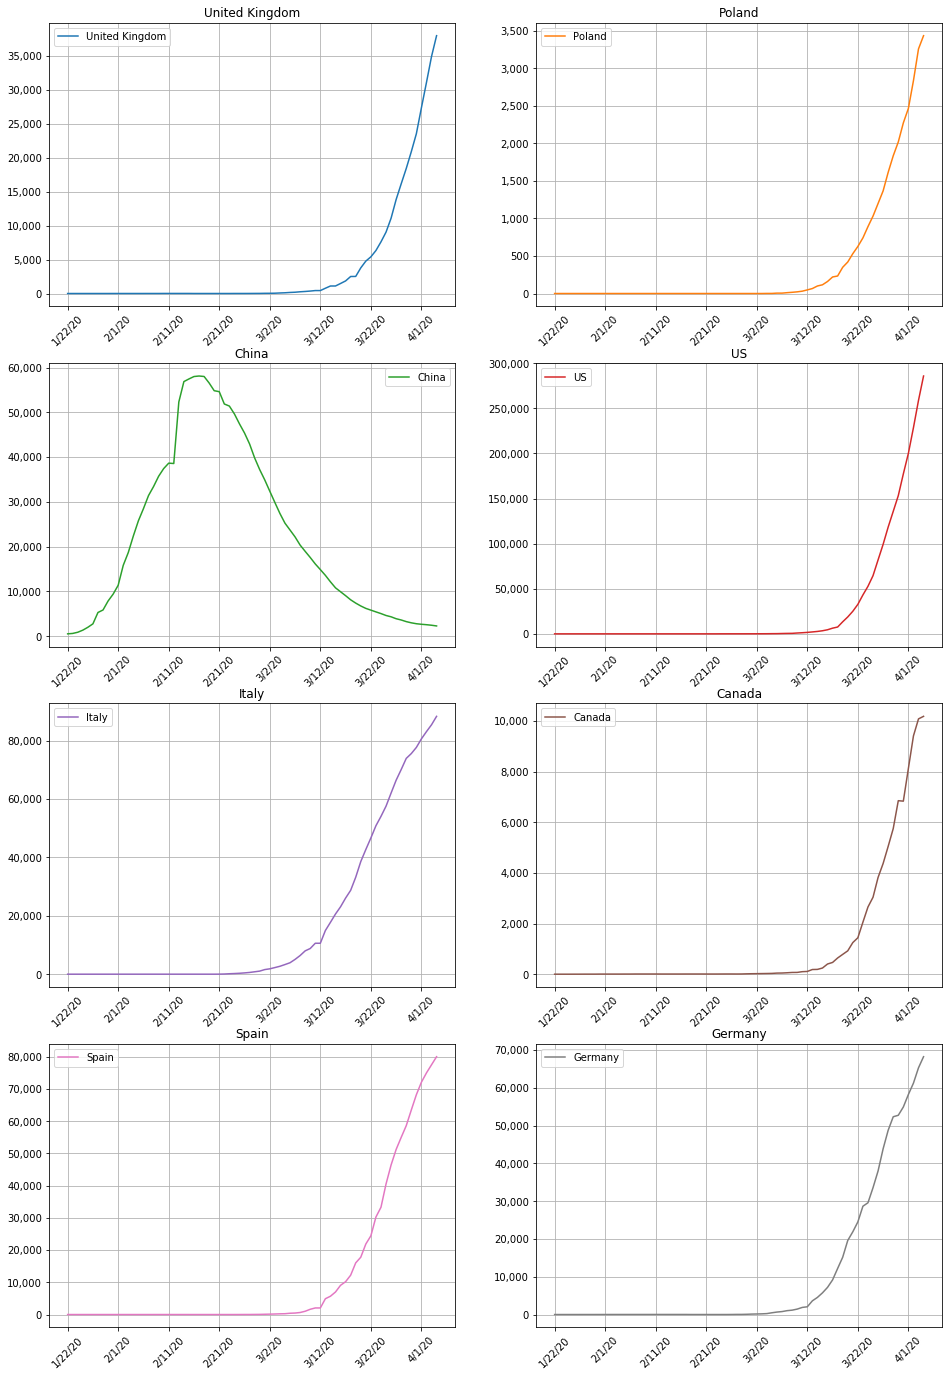

In [9]:
axs = (confirmed[COUNTRIES] - (recovered[COUNTRIES] + deaths[COUNTRIES])).\
plot(subplots=True,layout=(4,2),figsize=(16,24), title=COUNTRIES, sharex=False, rot=45, grid=True)
for row in axs:
    for ax in row:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## Active cases - one chart

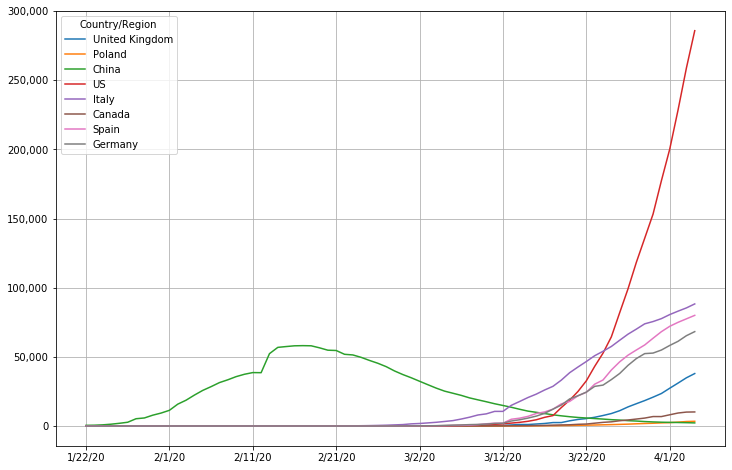

In [10]:
ax = (confirmed[COUNTRIES] - (recovered[COUNTRIES] + deaths[COUNTRIES])).plot(grid=True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Logarithmic scale charts
 

## Total confirmed cases (cumulative) - log scale

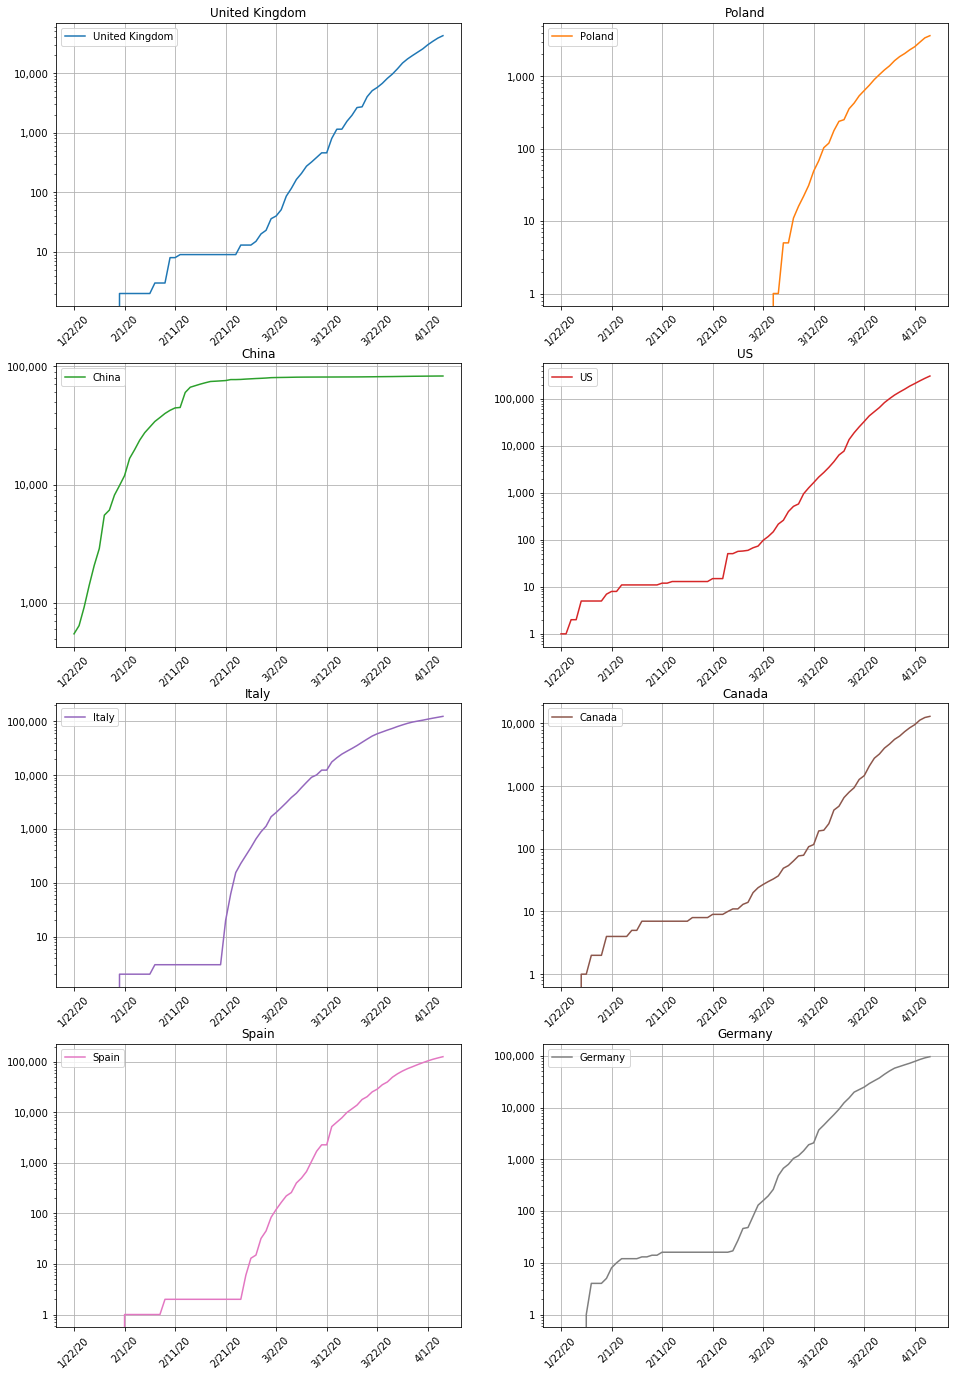

In [11]:
axs = confirmed[COUNTRIES].plot(subplots=True,layout=(4,2),figsize=(16,24),
                               title=COUNTRIES, sharex=False, rot=45, grid=True, logy=True)
for row in axs:
    for ax in row:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## Total confirmed cases (cumulative)  -  one chart, log scale

Text(0.5, 1.0, 'Total confirmed cases')

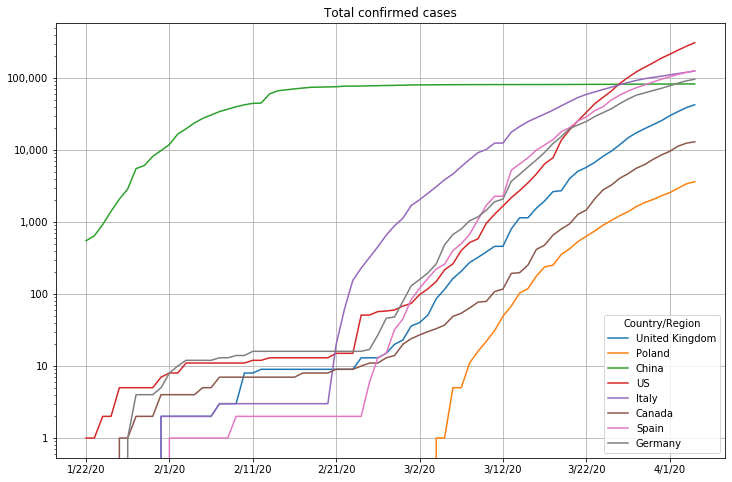

In [12]:
ax = confirmed[COUNTRIES].plot(grid=True,logy=True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Total confirmed cases')

## Active cases - log scale

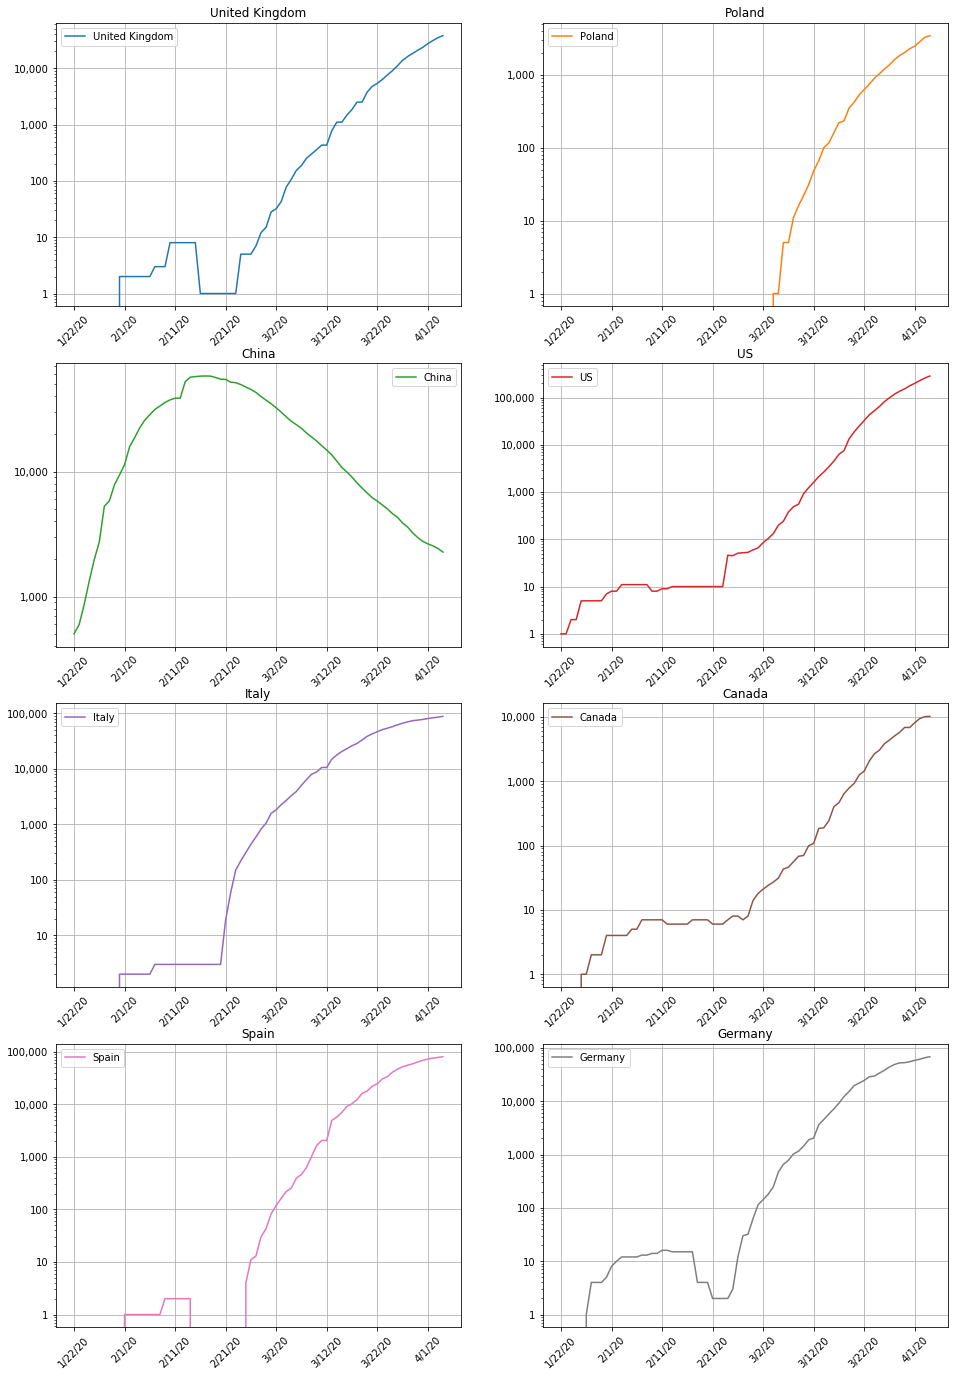

In [13]:
axs = (confirmed[COUNTRIES] - (recovered[COUNTRIES] + deaths[COUNTRIES])).\
plot(subplots=True,layout=(4,2),figsize=(16,24), title=COUNTRIES, sharex=False, rot=45, grid=True,logy=True)
for row in axs:
    for ax in row:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## Active cases - one chart, log scale

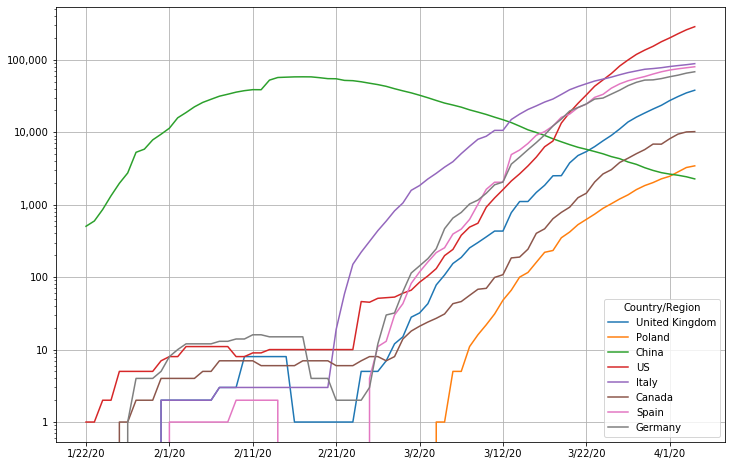

In [14]:
ax = (confirmed[COUNTRIES] - (recovered[COUNTRIES] + deaths[COUNTRIES])).plot(grid=True,logy=True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))